In [3]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
train_images.min(), train_images.max()

(0, 255)

In [6]:
test_images.min(), test_images.max()

(0, 255)

In [7]:
train_images = train_images / 255.0 
test_images = test_images / 255.0 

In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
train_labels_cat = tf.keras.utils.to_categorical(train_labels)
test_labels_cat = tf.keras.utils.to_categorical(test_labels)

In [13]:
train_images.shape

(60000, 28, 28)

In [22]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))



In [24]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [28]:
EPOCHS = 15 

history = model.fit(train_images, train_labels_cat, verbose=2, validation_split=0.2, epochs=EPOCHS)

2023-06-11 17:07:15.984591: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/15
1500/1500 - 17s - loss: 0.3465 - accuracy: 0.8718 - val_loss: 0.3522 - val_accuracy: 0.8731 - 17s/epoch - 12ms/step
Epoch 2/15
1500/1500 - 13s - loss: 0.3273 - accuracy: 0.8798 - val_loss: 0.3485 - val_accuracy: 0.8723 - 13s/epoch - 9ms/step
Epoch 3/15
1500/1500 - 11s - loss: 0.3104 - accuracy: 0.8848 - val_loss: 0.3431 - val_accuracy: 0.8742 - 11s/epoch - 8ms/step
Epoch 4/15
1500/1500 - 12s - loss: 0.2941 - accuracy: 0.8911 - val_loss: 0.3241 - val_accuracy: 0.8818 - 12s/epoch - 8ms/step
Epoch 5/15
1500/1500 - 23s - loss: 0.2784 - accuracy: 0.8969 - val_loss: 0.3262 - val_accuracy: 0.8823 - 23s/epoch - 15ms/step
Epoch 6/15
1500/1500 - 21s - loss: 0.2681 - accuracy: 0.8997 - val_loss: 0.3222 - val_accuracy: 0.8846 - 21s/epoch - 14ms/step
Epoch 7/15
1500/1500 - 23s - loss: 0.2605 - accuracy: 0.9020 - val_loss: 0.3397 - val_accuracy: 0.8762 - 23s/epoch - 15ms/step
Epoch 8/15
1500/1500 - 22s - loss: 0.2477 - accuracy: 0.9060 - val_loss: 0.3229 - val_accuracy: 0.8862 - 22s/epoch

In [29]:
model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 2s 7ms/step - loss: 0.3690 - accuracy: 0.8864


[0.36896950006484985, 0.8863999843597412]

(0.5, 1.0)

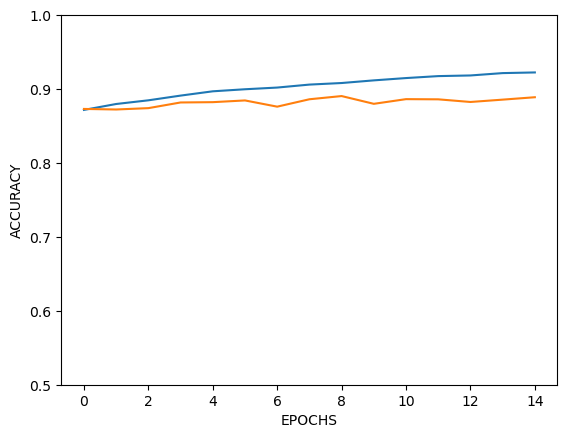

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.ylim([0.5, 1])